In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# wczytujemy dane z pliku csv
df = pd.read_csv('homework.csv')

# Zapoznanie się z danymi

In [3]:
df.head()

,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating
0,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0
1,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0
2,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0
3,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0
4,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             3118 non-null   object 
 1   Federation       3118 non-null   object 
 2   Gender           3118 non-null   object 
 3   Year_of_birth    3101 non-null   float64
 4   Title            3118 non-null   object 
 5   Standard_Rating  3118 non-null   int64  
 6   Rapid_rating     1765 non-null   float64
 7   Blitz_rating     1818 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 195.0+ KB


In [5]:
df.describe()

,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating
count,3101.000000,3118.000000,1765.000000,1818.000000
mean,1984.387939,2098.645285,2028.464023,2007.812431
std,14.522111,142.241725,189.305526,187.408267
min,1921.000000,1801.000000,1344.000000,1159.000000
25%,1976.000000,2006.000000,1910.000000,1888.000000
50%,1987.000000,2097.000000,2036.000000,2015.500000
75%,1996.000000,2188.000000,2150.000000,2125.750000
max,2010.000000,2675.000000,2646.000000,2736.000000


# Co jest niepotrzebne?

In [6]:
# skoro dataset dotyczy SZACHISTEK, nie ma sensu trzymać kolumny dotyczącej płci
# nie zamierzamy również dodawać żadnej z Pań do znajomych na Facebooku, zatem imię również jest zbędne
df = df.drop(['Name', 'Gender'], axis='columns')

In [7]:
df.head()

,Federation,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating
0,HUN,1976.0,GM,2675,2646.0,2736.0
1,CHN,1994.0,GM,2658,2621.0,2601.0
2,IND,1987.0,GM,2586,2483.0,2483.0
3,RUS,1998.0,GM,2582,2502.0,2441.0
4,HUN,1969.0,GM,2577,NaN,NaN


# Brakujące dane

In [8]:
# sprawdźmy, ile brakujących danych mamy
df.isna().sum()

Federation            0
Year_of_birth        17
Title                 0
Standard_Rating       0
Rapid_rating       1353
Blitz_rating       1300
dtype: int64

In [9]:
# rok możemy zainputować
df['Year_of_birth'] = df['Year_of_birth'].fillna(value=np.mean(df['Year_of_birth']))

In [10]:
# co zrobić z Rapid_ranking i Blitz_ranking?
# Domyślamy się, że skoro zawodniczka nie ma znanego ratingu dla szachów błyskawicznych albo szybkich,
# to znaczy, że nie ma ona takiego ratingu, możemy ustawić jego wartość jako 0
columns = ['Blitz_rating', 'Rapid_rating']
for col in columns:
    df[col] = df[col].fillna(value=0)

In [11]:
# sprawdźmy, czy działa
df.isna().sum()

Federation         0
Year_of_birth      0
Title              0
Standard_Rating    0
Rapid_rating       0
Blitz_rating       0
dtype: int64

In [12]:
# zastanówmy się, jakie są typy danych
# dane numeryczne to: Year_of_birth, Standard_Rating, Rapid_rating oraz Blitz_rating       
# dane kategoryczne porządkowe to: Title
# dane kategoryczne nominalne to: Federation

# Wizualizacja danych

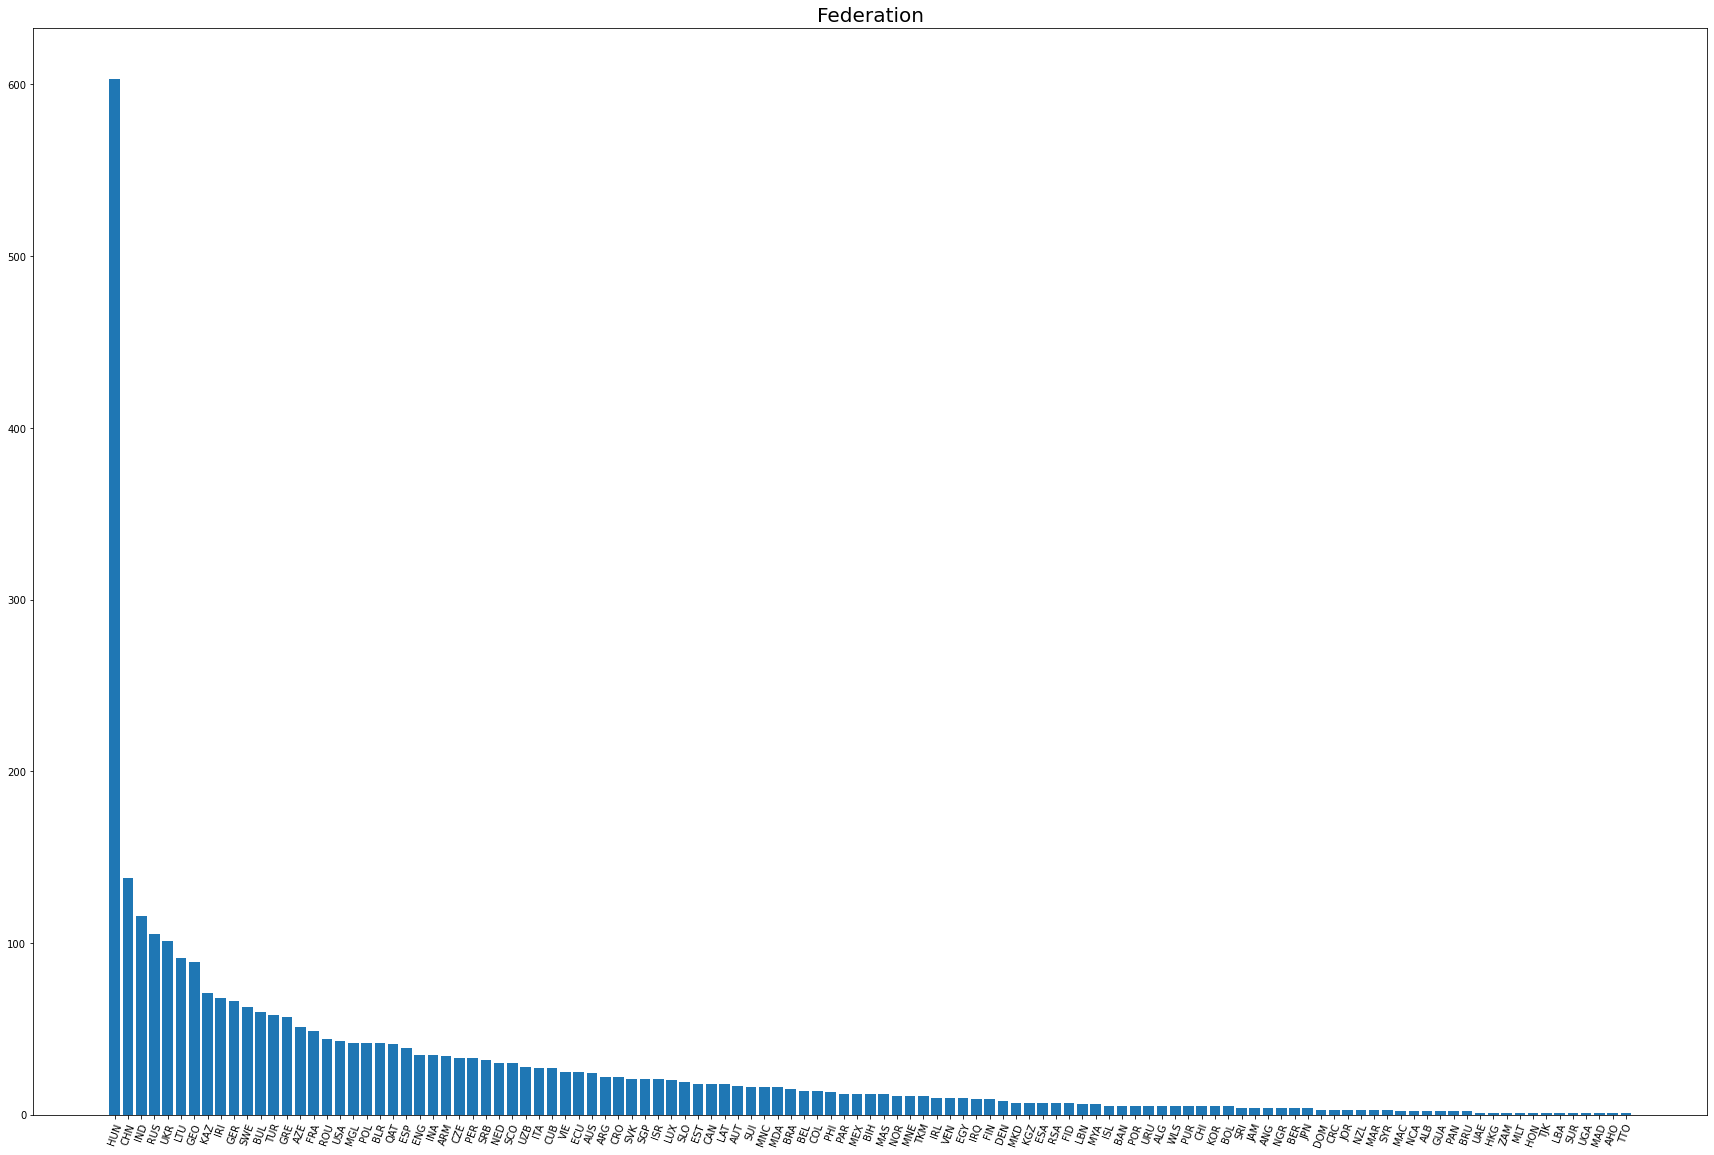

In [13]:
# jako, że unikalnych cech jest dużo, zwiększmy wykres
plt.figure(figsize=(30, 20))
plt.title('Federation', fontsize=20)
plt.bar(df['Federation'].unique(), df['Federation'].value_counts())
plt.xticks(rotation=70)
plt.show()

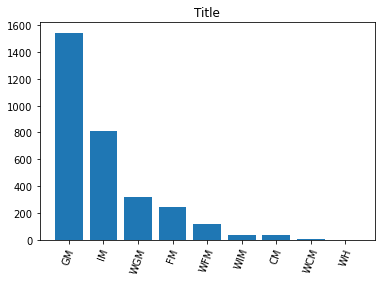

In [14]:
plt.title('Title')
plt.bar(df['Title'].unique(), df['Title'].value_counts())
plt.xticks(rotation=70)
plt.show()

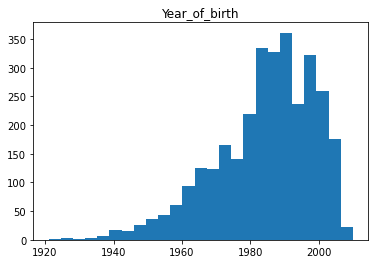

In [15]:
# rok urodzenia
plt.title('Year_of_birth')
plt.hist(df['Year_of_birth'], bins=25)
plt.show()

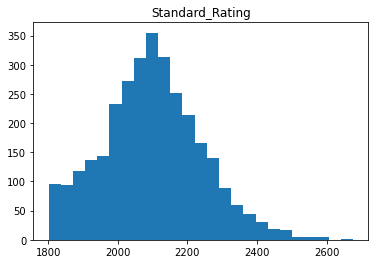

In [16]:
# ratingi
plt.title('Standard_Rating')
plt.hist(df['Standard_Rating'], bins=25)
plt.show()

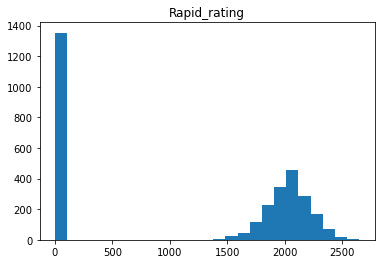

In [17]:
plt.title('Rapid_rating')
plt.hist(df['Rapid_rating'], bins=25)
plt.show()

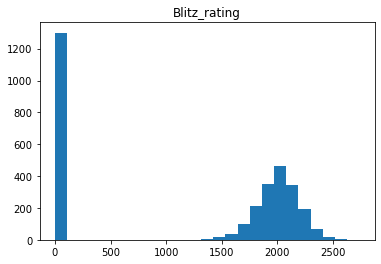

In [18]:
plt.title('Blitz_rating')
plt.hist(df['Blitz_rating'], bins=25)
plt.show()

# Preprocessing

In [19]:
# SVM polega na odległości, musimy wystandaryzować dane numeryczne
def scale_data(data):
    return data / max(data)

In [20]:
to_standarize = ['Standard_Rating', 'Rapid_rating', 'Blitz_rating', 'Year_of_birth']
for col in to_standarize:
    df[col] = scale_data(df[col])

In [21]:
# działa
df.describe()

,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating
count,3118.000000,3118.000000,3118.000000,3118.000000
mean,0.987258,0.784540,0.433956,0.427883
std,0.007205,0.053174,0.383800,0.365643
min,0.955721,0.673271,0.000000,0.000000
25%,0.983085,0.749907,0.000000,0.000000
50%,0.988557,0.783925,0.681217,0.665205
75%,0.993035,0.817944,0.778817,0.747350
max,1.000000,1.000000,1.000000,1.000000


In [22]:
# musimy zmapować tytuły, wypiszmy je
df['Title'].unique()

array(['GM', 'IM', 'WGM', 'FM', 'WFM', 'WIM', 'CM', 'WCM', 'WH'],
      dtype=object)

In [23]:
# w googlu szukamy jaki tytuł co znaczy
# GM - Grandmaster
# WGM- Woman Grandmaster
# ===========================
# IM - International Master
# WIM - Woman International Master
# ===========================
# FM - Master
# WFM - Woman Master
# ===========================
# CM - Candidate Master
# WCM - Woman Candidate Master
# ===========================
# WH - Honorary Grandmaster(?)
# ===========================
# z tego wynika, że GM i WGM to to samo, IM i WIM też etc.
# ranking wygląda tak:
# 1. GM
# 2. IM
# 3. FM
# 4. CM
# 5. WH
# oczywiście nie oznacza to, że to dobre rozwiązanie, być może po testowaniu modelu okaże się, że inna metoda jest lepsza
# nie wiadomo np. jak traktować WH, być może sensowne jest wyrzucenie takiej próbki, bo nie spotkamy się z nią za często
# w realnym świecie, a po to przecież tworzymy model
# data science to w głównej mierze kombinowanie

In [24]:
title_map = {
    'GM': 4,
    'WGM': 4,
    'IM': 3,
    'WIM': 3,
    'FM': 2,
    'WFM': 2,
    'CM': 1,
    'WCM': 1,
    'WH': 0
}

In [25]:
# mapujemy
df['Title'] = df['Title'].map(title_map)

In [26]:
# sprawdźmy, czy nic nie pominęliśmy
df['Title'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [27]:
# co zrobić z federacjami, jest ich bardzo dużo
# nie mówiłem o klątwie wymiarów, bo to już bardziej zaawansowany temat
# w takiej sytuacji trzeba kombinować, pogrupować te federacje np. na kilka grup, ale to już bardziej złożony feature engineering

In [28]:
# w wersji podstawowej
df_dummies = pd.get_dummies(df, columns=['Federation'], drop_first=True)

In [29]:
df_dummies.head()

,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Federation_ALB,Federation_ALG,Federation_ANG,Federation_ARG,Federation_ARM,...,Federation_UAE,Federation_UGA,Federation_UKR,Federation_URU,Federation_USA,Federation_UZB,Federation_VEN,Federation_VIE,Federation_WLS,Federation_ZAM
0,0.983085,4,1.000000,1.000000,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.992040,4,0.993645,0.990552,0.950658,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.988557,4,0.966729,0.938398,0.907529,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.994030,4,0.965234,0.945578,0.892178,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.979602,4,0.963364,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


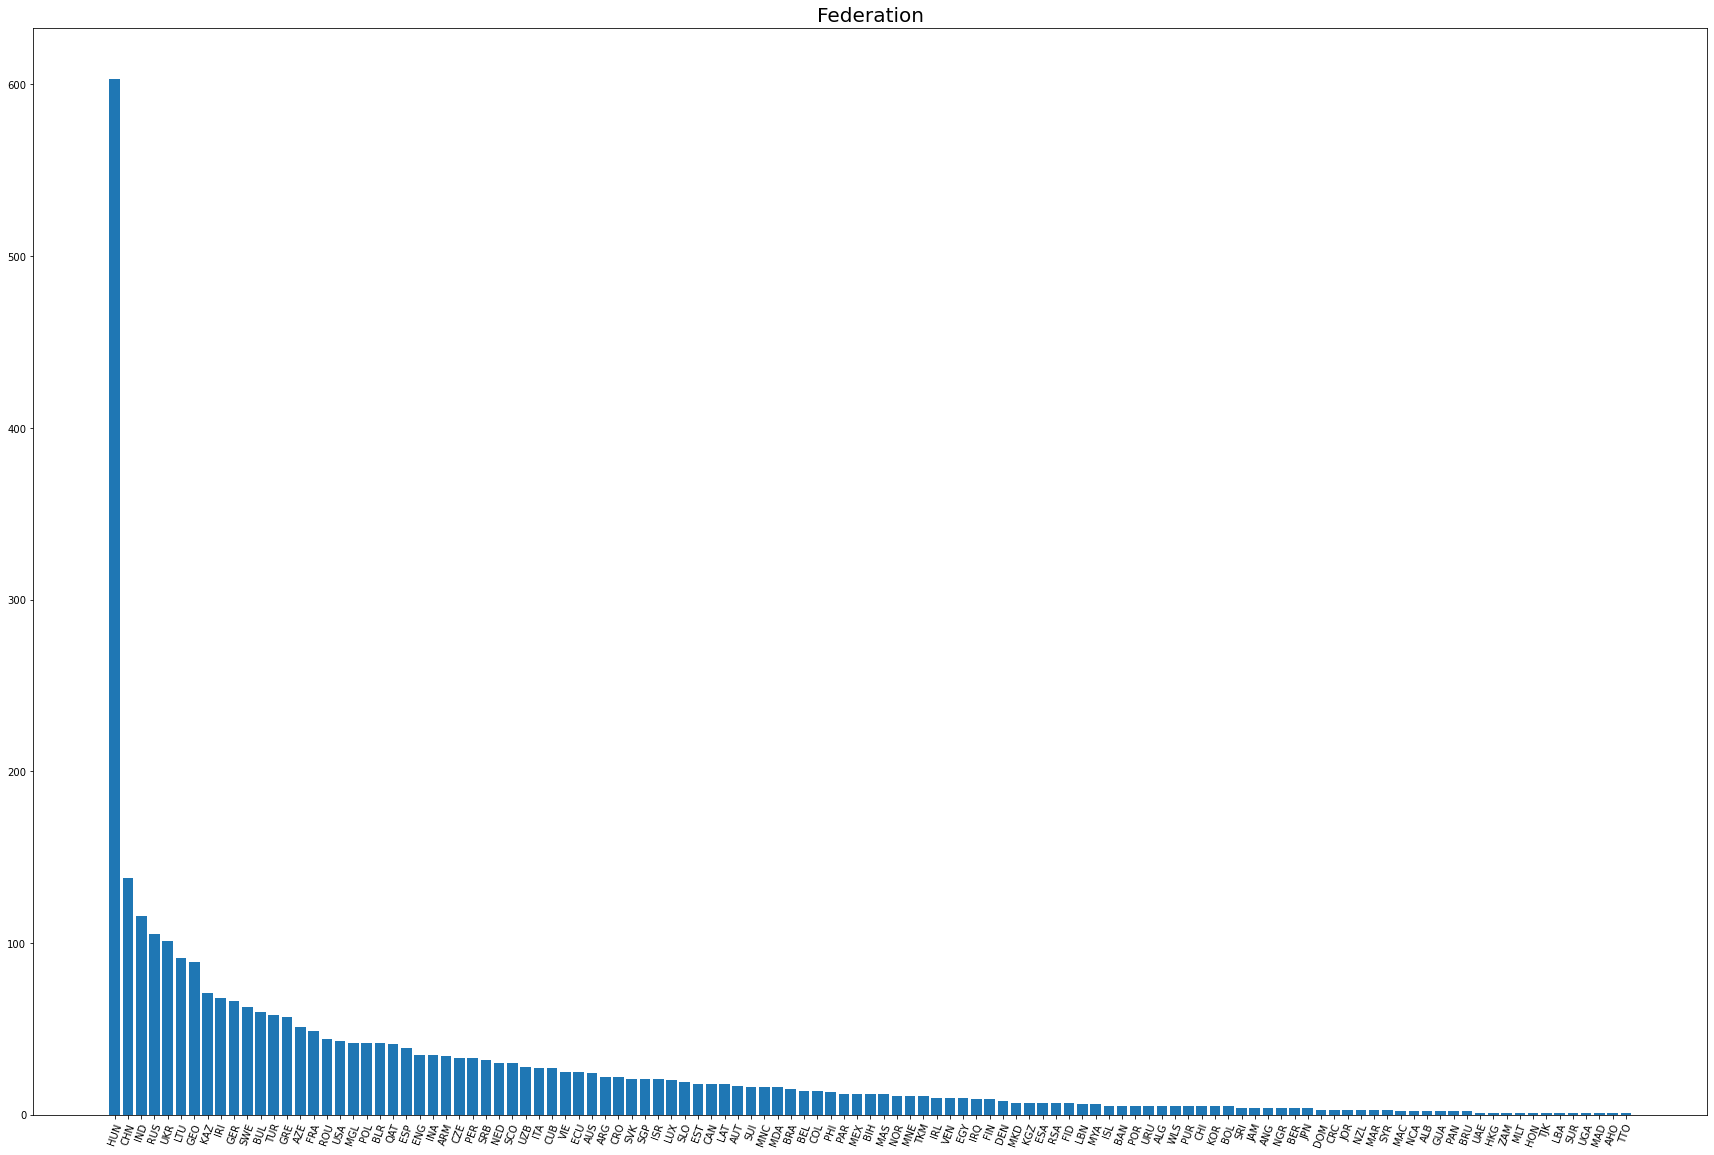

In [30]:
# teraz wersja zaawansowana (bardzo zaawansowana), przywołajmy nasz histogram jeszcze raz
plt.figure(figsize=(30, 20))
plt.title('Federation', fontsize=20)
plt.bar(df['Federation'].unique(), df['Federation'].value_counts())
plt.xticks(rotation=70)
plt.show()

In [31]:
# sprawdźmy, jak wygląda sprawa ze średnimi wartościami punktów za ratingi dla zawodniczek z danej federacji
# pogrupuję dane ze względu na federację
df_group = df.groupby(by='Federation').mean()

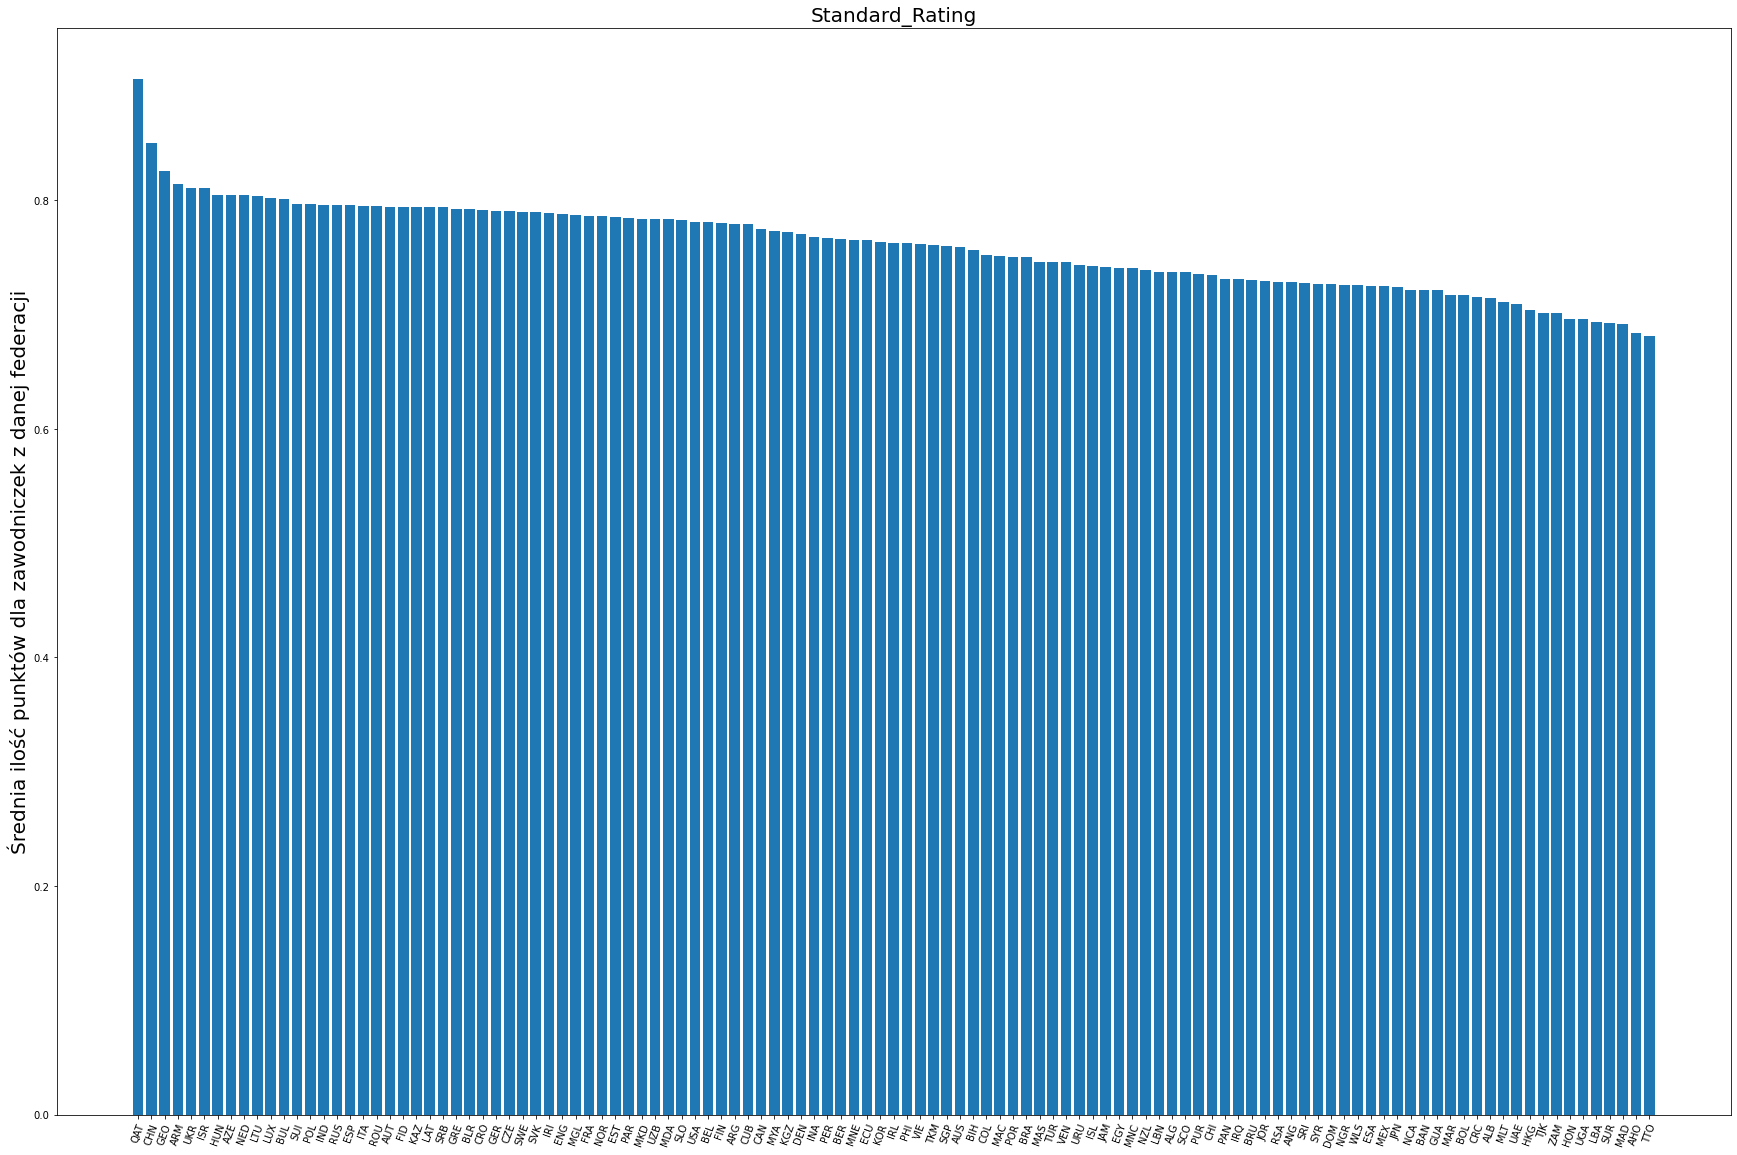

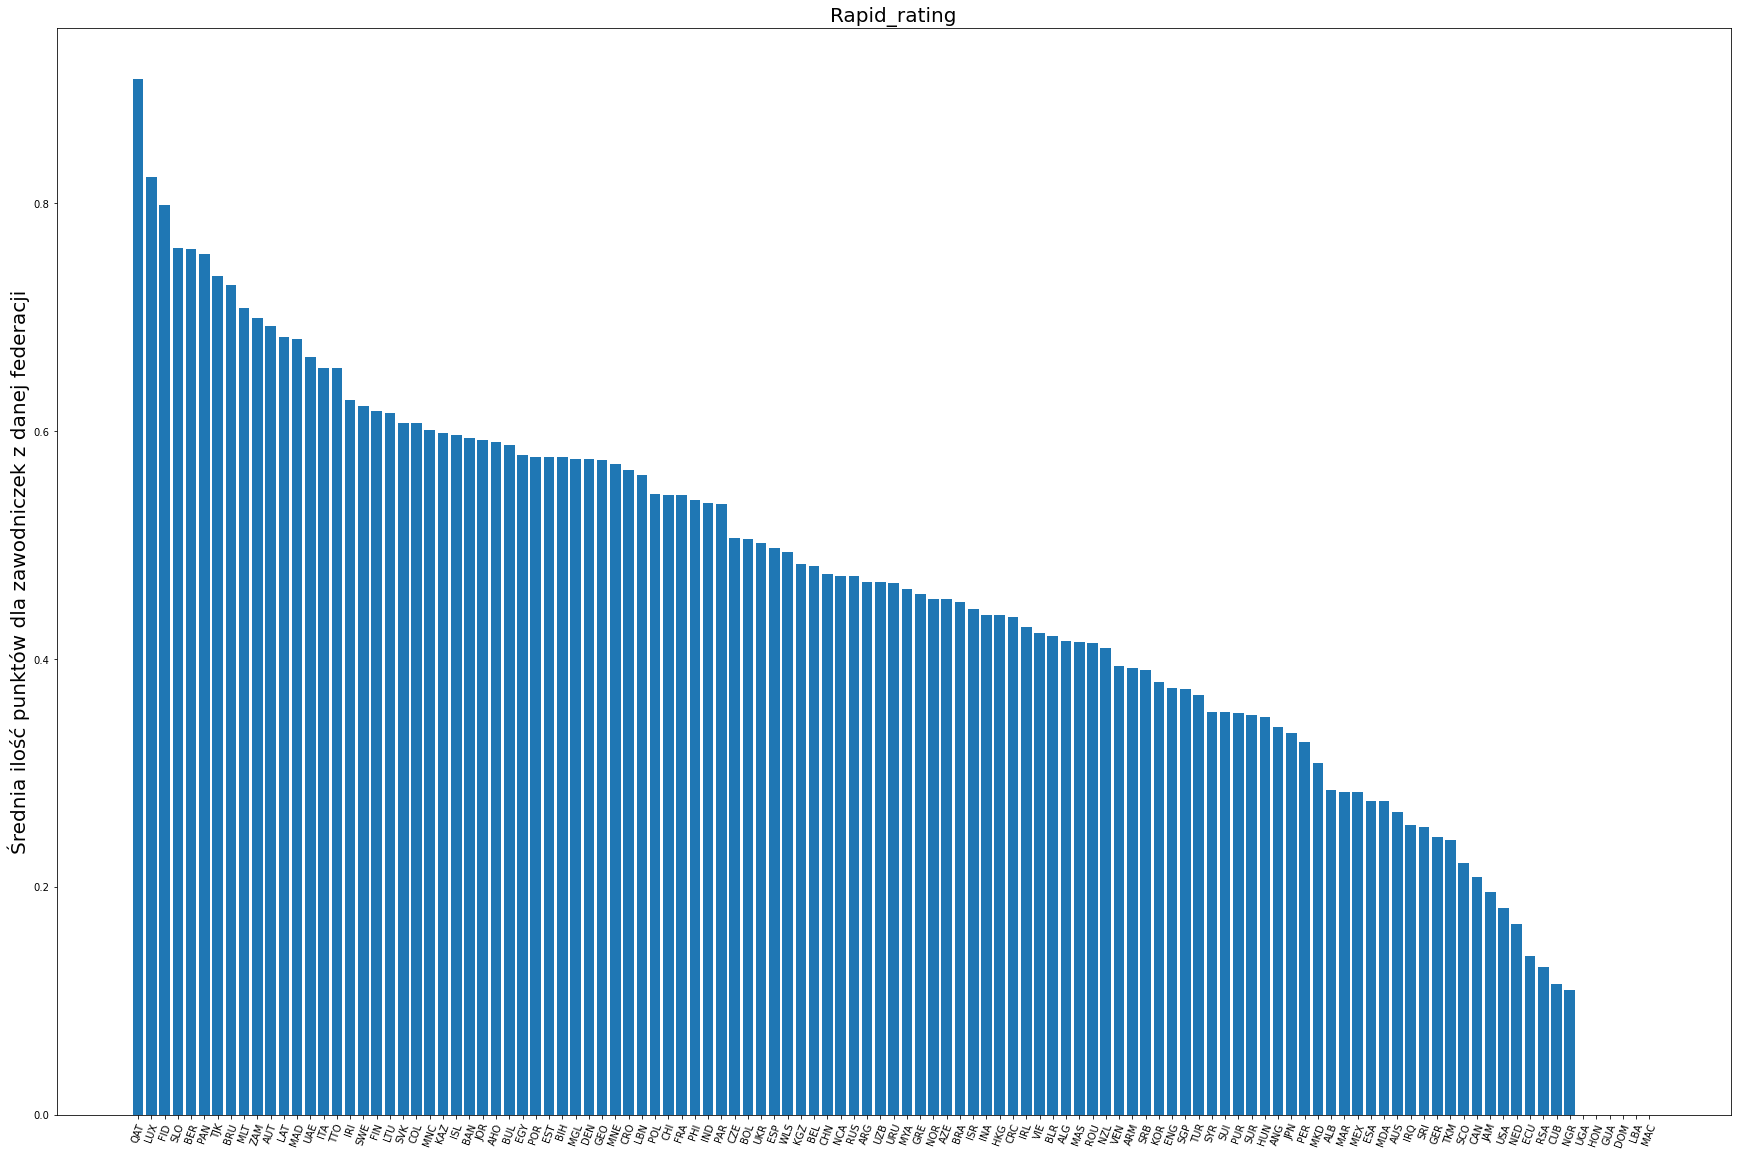

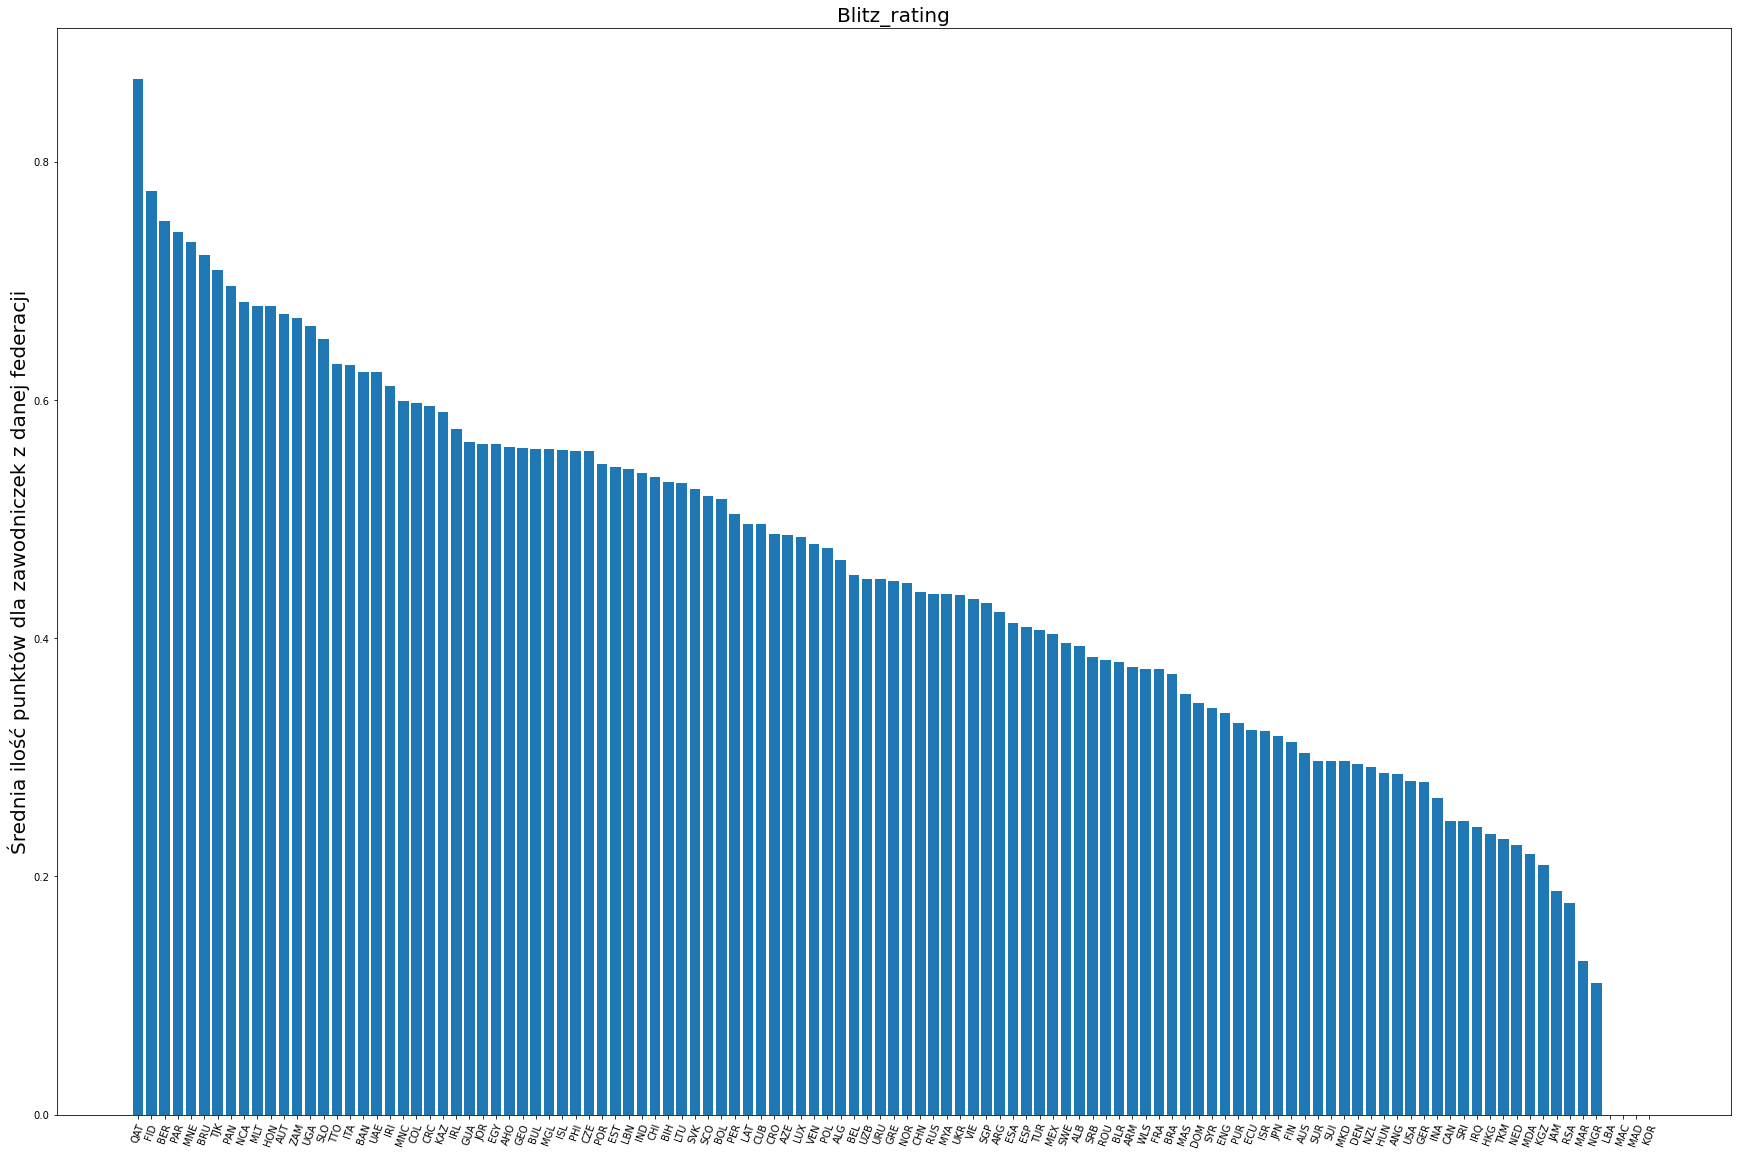

In [32]:
ratings = ['Standard_Rating', 'Rapid_rating', 'Blitz_rating']
for rating in ratings:
    # sortuję ze względu na rating
    sort_rating = df_group.sort_values(by=rating, ascending=False)
    plt.figure(figsize=(30, 20))
    plt.title(rating, fontsize=20)
    plt.bar(sort_rating.index, sort_rating[rating])
    plt.xticks(rotation=70)
    plt.ylabel('Średnia ilość punktów dla zawodniczek z danej federacji', fontsize=20)
    plt.show()

In [33]:
# rozwiązań jest kilka, stworzyć przedziały dla każdego ratingu,
# stworzyć jeden dla średniej wartości punktowej z tych trzech ratingów...
# ja zdecyduję się na drugą opcję, aczkolwiek jest to rzecz do przetestowania
# UWAGA!!!
# oczywiście przykład jest do ćwiczenia, nie wiemy nawet, co mamy przewidzieć
# w praktyce może się okazać, że te rozwiązanie jest totalnie nieskuteczne 
# mimo wszystko chcę pokazać, co można zrobić ;)

In [34]:
ratings = ['Standard_Rating', 'Rapid_rating', 'Blitz_rating']
df_group['Mean_Rating'] = df_group[ratings].mean(axis=1)

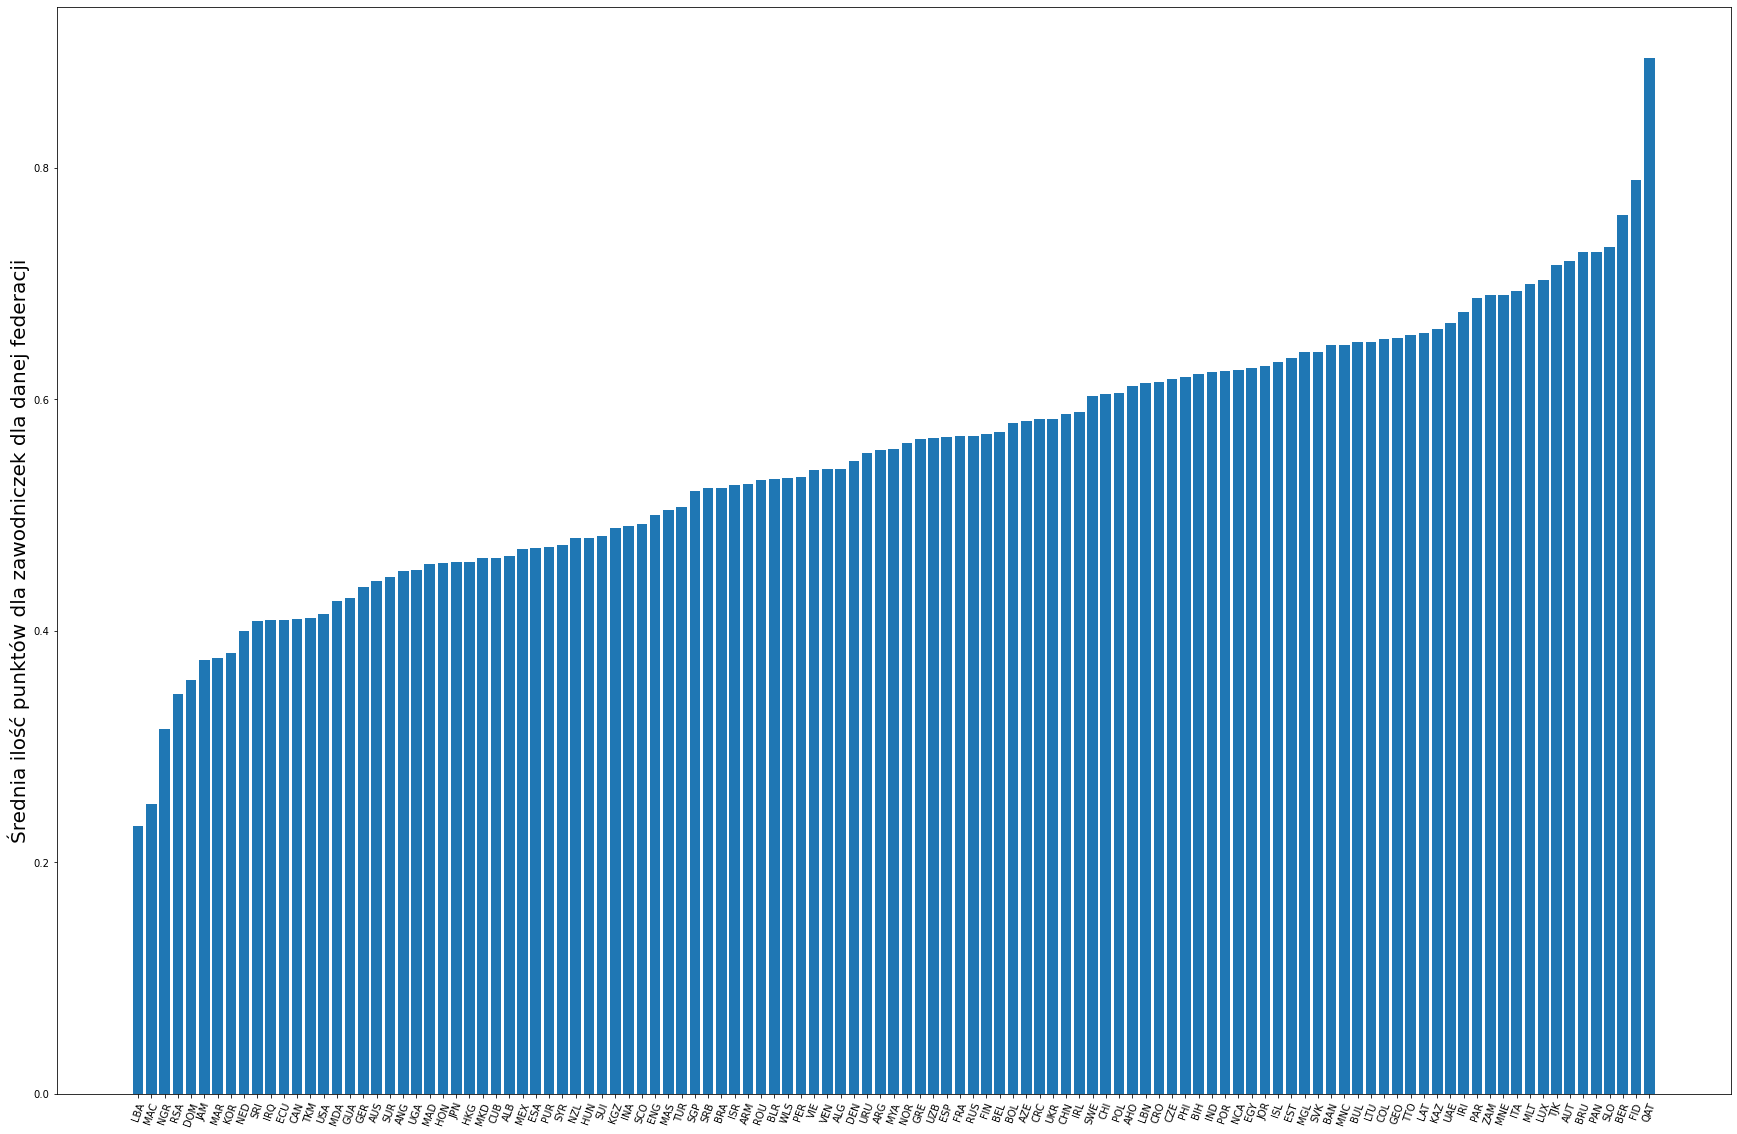

In [35]:
sort_rating = df_group.sort_values(by='Mean_Rating')
plt.figure(figsize=(30, 20))
plt.bar(sort_rating.index, sort_rating['Mean_Rating'])
plt.xticks(rotation=70)
plt.ylabel('Średnia ilość punktów dla zawodniczek dla danej federacji', fontsize=20)
plt.show()

In [36]:
# stwórzmy koszyki 
boxes = pd.cut(sort_rating['Mean_Rating'], bins=10)
sort_rating['Mean_Rating'] = boxes
boxes.unique()

[(0.231, 0.298], (0.298, 0.364], (0.364, 0.43], (0.43, 0.497], (0.497, 0.563], (0.563, 0.629], (0.629, 0.696], (0.696, 0.762], (0.762, 0.828], (0.828, 0.894]]
Categories (10, interval[float64]): [(0.231, 0.298] < (0.298, 0.364] < (0.364, 0.43] < (0.43, 0.497] ... (0.629, 0.696] < (0.696, 0.762] < (0.762, 0.828] < (0.828, 0.894]]

In [37]:
# teraz przyporządkujmy federacje do koszyków
federation_map = dict()
sort_rating = sort_rating.reindex(index=sort_rating.index[::-1])
for i, box in enumerate(boxes.unique()):
    mask = sort_rating[sort_rating['Mean_Rating'] == box].index
    for key in mask:
        federation_map[key] = i

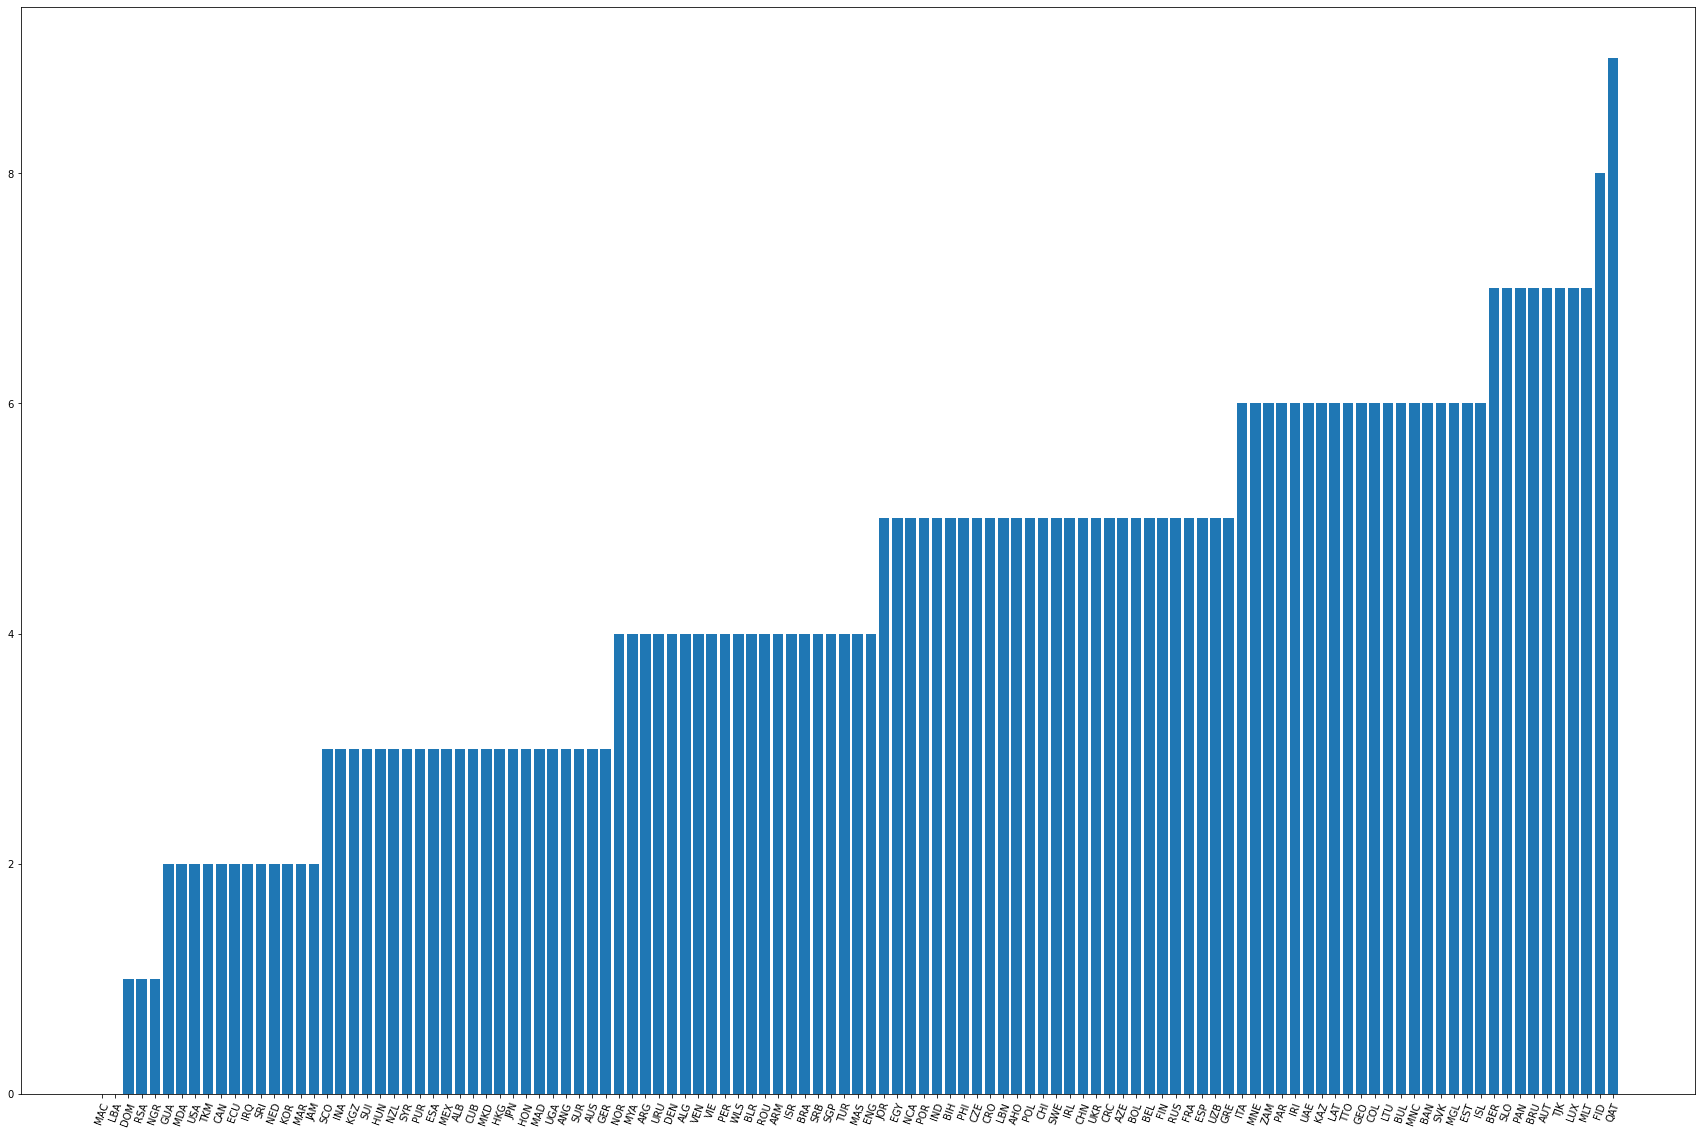

In [38]:
# sprawdźmy, czy działa
plt.figure(figsize=(30, 20))
plt.bar(federation_map.keys(), federation_map.values())
plt.xticks(rotation=70)
plt.show()

In [39]:
# działa, zaaplikujmy to teraz
df['Federation'] = df['Federation'].map(federation_map)

In [40]:
# teraz uwaga, federacje to zmienne porządkowe, ponieważ ustawialiśmy je w porządku jeżeli chodzi o średnią ilość punktów
# całość zostawiamy tak jak jest
df.head()

,Federation,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating
0,3,0.983085,4,1.000000,1.000000,1.000000
1,5,0.992040,4,0.993645,0.990552,0.950658
2,5,0.988557,4,0.966729,0.938398,0.907529
3,5,0.994030,4,0.965234,0.945578,0.892178
4,3,0.979602,4,0.963364,0.000000,0.000000
